### Importing Libraries

To pull data from a CSV file, you must use the reader function to generate a reader object.  
NumPy is a package in Python used for Scientific Computing. NumPy package is used to perform different operations.  
Sklearn is a simple and efficient tool for data mining and data analysis built on numpy, scipy and matplotlib.  
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.  

In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

The SVR module imported from sklearn.svm carries out Support Vector Regression under the Support Vector Machine sub-library of sklearn.  
There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers linear kernels, while NuSVR implements a slightly different formulation than SVR and LinearSVR.

### Initialising the 'dates' and 'prices' lists

A list is a data structure in Python that is a mutable, or changeable, ordered sequence of elements. Each element or value that is inside of a list is called an item.

In [2]:
dates = []
prices = []

### Defining the get_data() function

Step 1: Read the CSV file  
Step 2: Skip the column names of the CSV file  
Step 3: Read each row  
Step 4: From each row, add element of 1st column to 'dates' list  
Step 5: From each row, add element of 2nd column to 'prices' list  

In [3]:
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

### Defining the predict_price() function

Step 1: Convert the 'dates' list to a nx1 matrix.  
Step 2: Defining the SVR models. Making the radial basis function (rbf), linear and polynomial kernels for the SVR model.  
Step 3: Fitting the data points in the model.

#### When this function is called, it will:
Step 4: Scatter plot the initial data points in black.  
Step 5: Plot the best-fit line by the RBF kernel in red.  
Step 6: Plot the best-fit line by the linear kernel in green.  
Step 7: Plot the best-fit line by the polynomial kernel in blue.  
Step 8: Return as lines made by the:  
a. RBF kernel  
b. Linear kernel  
c. Polynomial kernel

In [4]:
def predict_price(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) 

    svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) 
    svr_lin = SVR(kernel= 'linear', C= 1e3)
    svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
    svr_rbf.fit(dates, prices)
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)

    plt.scatter(dates, prices, color= 'black', label= 'Data') 
    plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
    plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') 
    plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

### Getting and reading the CSV file

Actually calling the get_data() function.

In [5]:
get_data('/Users/rounakbose/Git Local/goog.csv') 
print ("Dates- ", dates)
print ("Prices- ", prices)

Dates-  [26, 25, 24, 23, 22, 19, 18, 17, 16, 12, 11, 10, 9, 8, 5, 4, 3, 2, 1]
Prices-  [708.58, 700.01, 688.92, 701.45, 707.45, 695.03, 710.0, 699.0, 692.98, 690.26, 675.0, 686.86, 672.32, 667.85, 703.87, 722.81, 770.22, 784.5, 750.46]


### Showing the results

1. The predicted stock price for a new date, as calculated by the:
a. RBF kernel
b. Linear kernel
c. Polynomial kernel
2. The scatter plot.

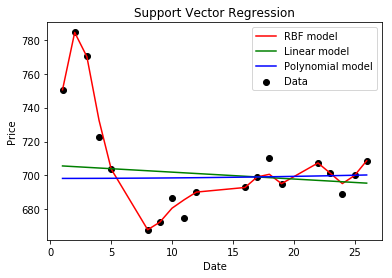


The stock open price for 29th Feb is:
RBF kernel: $ 692.6220494803164
Linear kernel: $ 694.2300000000146
Polynomial kernel: $ 700.7592857577666


In [6]:
predicted_price = predict_price(dates, prices, 29)  
print ("\nThe stock open price for 29th Feb is:")
print ("RBF kernel: $", str(predicted_price[0]))
print ("Linear kernel: $", str(predicted_price[1]))
print ("Polynomial kernel: $", str(predicted_price[2]))

### Conclusion

As evident from the plot above, the Polynomial kernel model did not work out better than the Linear kernel model.
But, we can say with conviction, that the RBF kernel did a pretty good job at the regression.
That said, we need to make sure that the RBF kernel model does not overfit to the training data.
Now let us try even more advanced tools like an RNN, next, for short-term stock market predictions.